## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/hahaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units = 10, num_neurons = [256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0: 
            x = keras.layers.Dense(units = n_units, activation = 'relu')(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu')(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units = output_units, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for batch in BATCH_SIZE:
    keras.backend.clear_session()
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov = True, momentum = MOMENTUM)
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train, y_train, epochs = EPOCHS, batch_size = batch, validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_label = 'exp-batch-%s' %(str(batch))
    results[exp_label] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256 

Epoch 46/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.0100 - accuracy: 0.6407 - val_loss: 1.5101 - val_accuracy: 0.4859
Epoch 47/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.0000 - accuracy: 0.6432 - val_loss: 1.4598 - val_accuracy: 0.5066
Epoch 48/50
50000/50000 [==============================] - 10s 198us/step - loss: 0.9989 - accuracy: 0.6434 - val_loss: 1.4501 - val_accuracy: 0.5089
Epoch 49/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.9954 - accuracy: 0.6444 - val_loss: 1.5424 - val_accuracy: 0.4906
Epoch 50/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.9910 - accuracy: 0.6462 - val_loss: 1.4965 - val_accuracy: 0.4978
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___________________________________

50000/50000 [==============================] - 5s 97us/step - loss: 0.6953 - accuracy: 0.7542 - val_loss: 1.9171 - val_accuracy: 0.4618
Epoch 42/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.6862 - accuracy: 0.7558 - val_loss: 1.8982 - val_accuracy: 0.4538
Epoch 43/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.6678 - accuracy: 0.7626 - val_loss: 1.9064 - val_accuracy: 0.4659
Epoch 44/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.6547 - accuracy: 0.7665 - val_loss: 1.9828 - val_accuracy: 0.4643
Epoch 45/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.6498 - accuracy: 0.7694 - val_loss: 1.9667 - val_accuracy: 0.4483
Epoch 46/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.6398 - accuracy: 0.7727 - val_loss: 1.9510 - val_accuracy: 0.4618
Epoch 47/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.6257 - accuracy: 0.7777 - val_loss: 1.9819

50000/50000 [==============================] - 5s 98us/step - loss: 0.7382 - accuracy: 0.7460 - val_loss: 1.7859 - val_accuracy: 0.4642
Epoch 37/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.7213 - accuracy: 0.7522 - val_loss: 1.7909 - val_accuracy: 0.4639
Epoch 38/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.7082 - accuracy: 0.7526 - val_loss: 1.8140 - val_accuracy: 0.4582
Epoch 39/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.6958 - accuracy: 0.7573 - val_loss: 1.8353 - val_accuracy: 0.4509
Epoch 40/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.6827 - accuracy: 0.7641 - val_loss: 1.9766 - val_accuracy: 0.4473
Epoch 41/50
50000/50000 [==============================] - 4s 82us/step - loss: 0.6694 - accuracy: 0.7682 - val_loss: 1.8604 - val_accuracy: 0.4542
Epoch 42/50
50000/50000 [==============================] - 4s 79us/step - loss: 0.6575 - accuracy: 0.7735 - val_loss: 1.9047

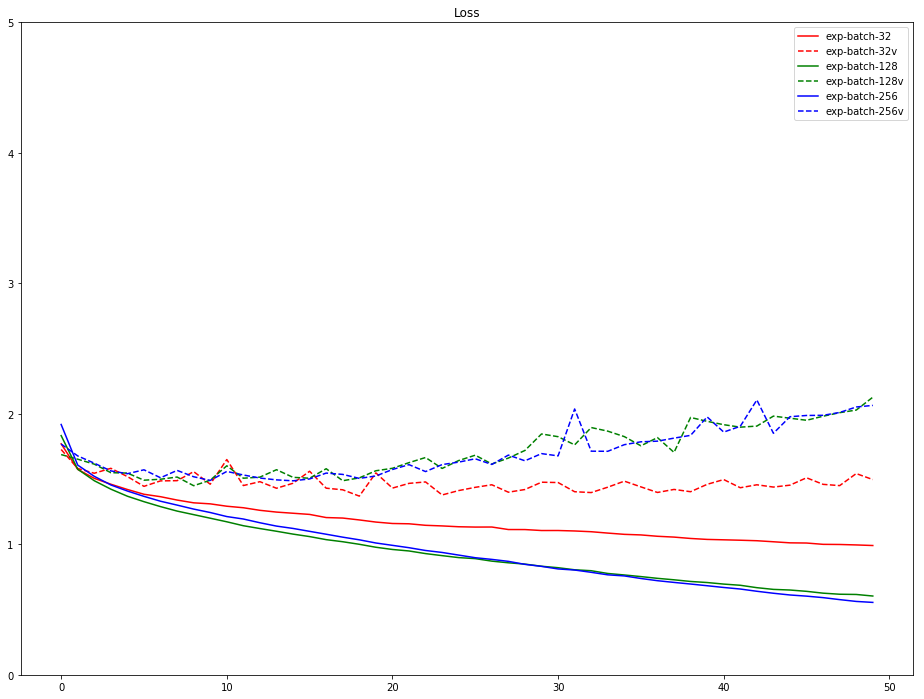

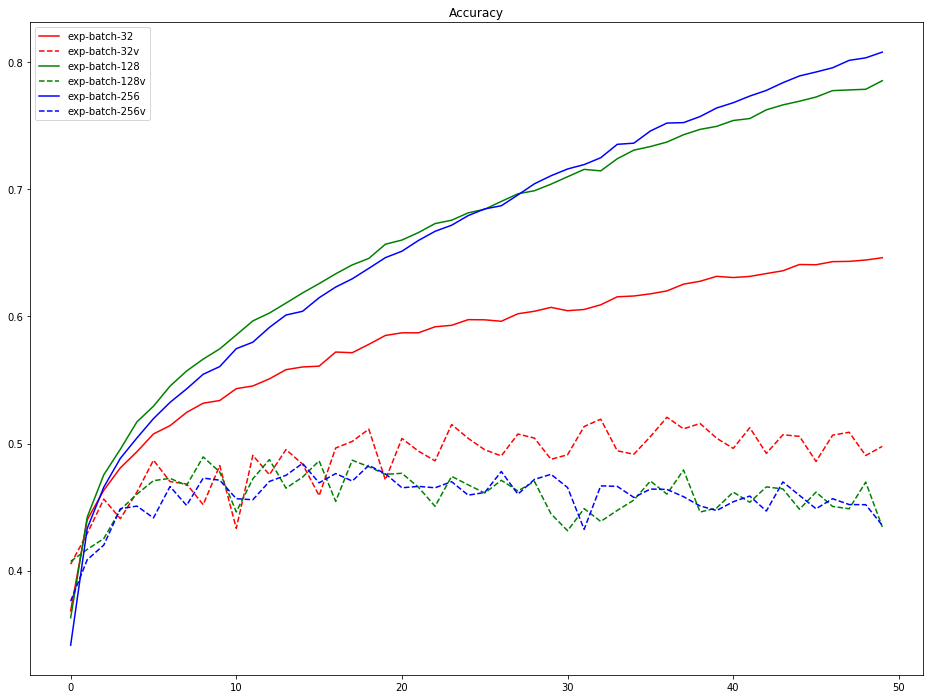

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k", "c"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond+'v', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond+'v', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
def build_mlp2(input_shape, output_units = 10, num_neurons = [256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0: 
            x = keras.layers.Dense(units = n_units, activation = 'relu')(input_layer)
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units = n_units, activation = 'relu')(x)
    
    out = keras.layers.Dense(units = output_units, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [13]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
functions = [build_mlp, build_mlp2]

In [14]:
results2 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for fun in functions:
    keras.backend.clear_session()
    model = fun(input_shape = x_train.shape[1:])
    model.summary()
    
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov = True, momentum = MOMENTUM)
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train, y_train, epochs = EPOCHS, batch_size = batch, validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_label = 'exp-function-%s' %(fun)
    results2[exp_label] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256 

50000/50000 [==============================] - 4s 89us/step - loss: 0.6106 - accuracy: 0.7885 - val_loss: 2.0106 - val_accuracy: 0.4544
Epoch 47/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.6060 - accuracy: 0.7885 - val_loss: 1.9414 - val_accuracy: 0.4568
Epoch 48/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.5832 - accuracy: 0.7999 - val_loss: 2.0840 - val_accuracy: 0.4533
Epoch 49/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.5744 - accuracy: 0.8011 - val_loss: 1.9985 - val_accuracy: 0.4601
Epoch 50/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.5553 - accuracy: 0.8084 - val_loss: 2.1140 - val_accuracy: 0.4537
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________

50000/50000 [==============================] - 4s 89us/step - loss: 0.6449 - accuracy: 0.7780 - val_loss: 1.7846 - val_accuracy: 0.4750
Epoch 43/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.6341 - accuracy: 0.7837 - val_loss: 1.8727 - val_accuracy: 0.4684
Epoch 44/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.6241 - accuracy: 0.7868 - val_loss: 1.8373 - val_accuracy: 0.4677
Epoch 45/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.6044 - accuracy: 0.7939 - val_loss: 1.9389 - val_accuracy: 0.4619
Epoch 46/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.5893 - accuracy: 0.8002 - val_loss: 1.8780 - val_accuracy: 0.4729
Epoch 47/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5813 - accuracy: 0.8008 - val_loss: 1.9724 - val_accuracy: 0.4553
Epoch 48/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.5691 - accuracy: 0.8057 - val_loss: 1.8277

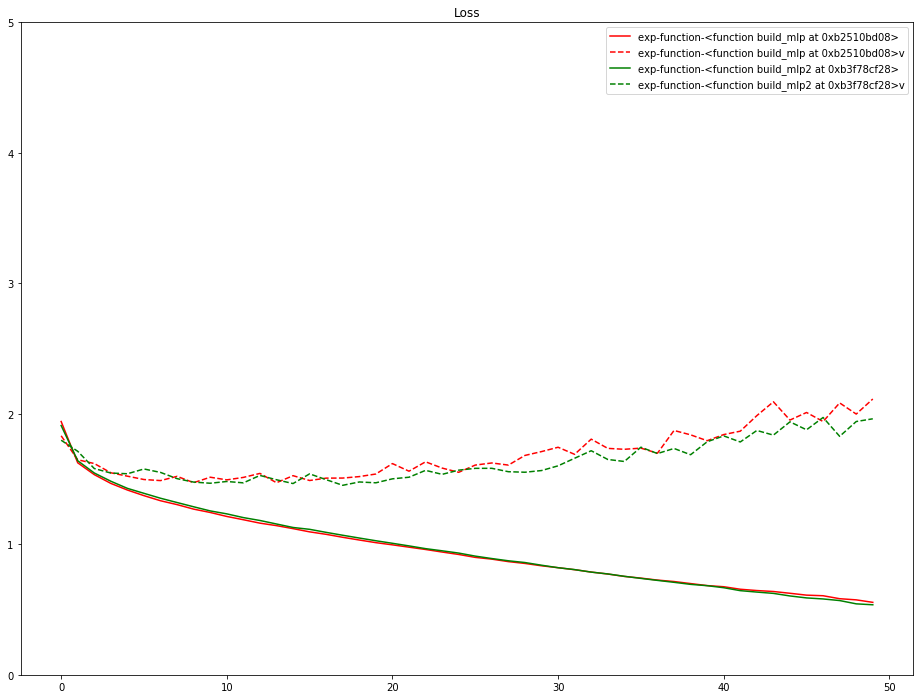

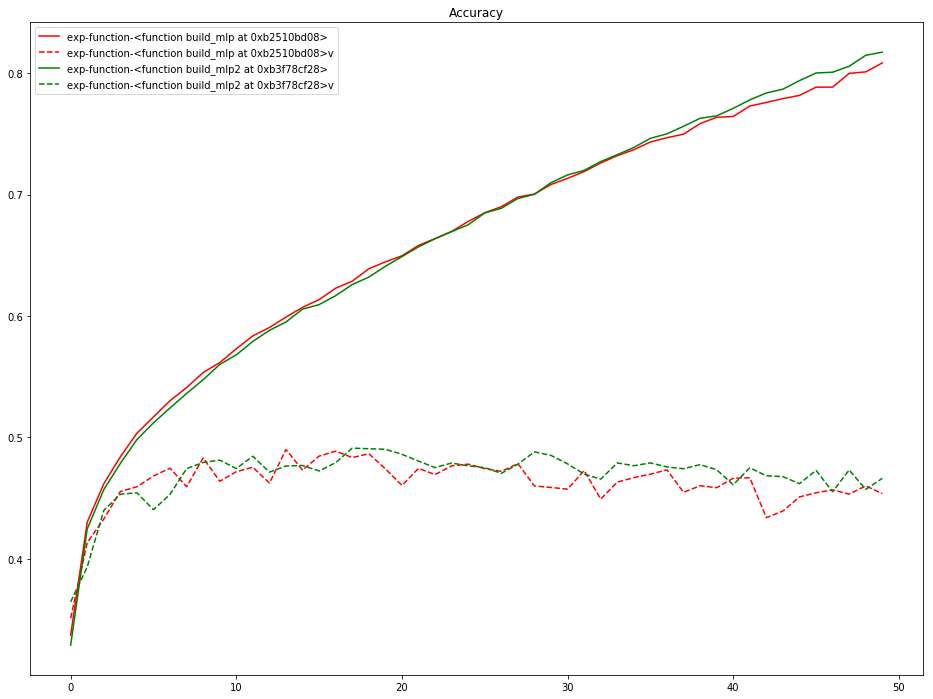

In [15]:
color_bar = ["r", "g", "b", "y", "m", "k", "c"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond+'v', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond+'v', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()